In [1]:
%pylab inline

import numpy as np

import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


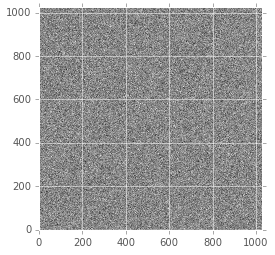

In [2]:
img = np.random.normal(0., 10., (1028,1028))
plt.imshow(img, origin='lower', interpolation='none', cmap='gray')

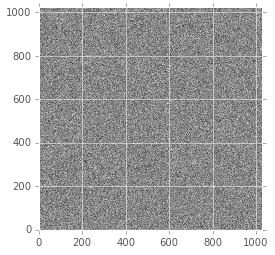

In [3]:
from ipywidgets import interact
def plot_interact(img):
    
    def plot_subarr(x1=0, x2=img.shape[0]-1, y1=0, y2=img.shape[1]-1):
        if x2 <= x1: x2 = x1 + 1
        if y2 <= y1: y2 = y1 + 1
        plt.imshow(img[x1:x2, y1:y2], extent=(x1, x2, y1, y2), 
                   origin='lower', interpolation='none', cmap='gray')

    interact(plot_subarr, x1=(0,img.shape[0]-2), x2=(0,img.shape[0]), 
                          y1=(0,img.shape[1]-2), y2=(0,img.shape[1]))
    
plot_interact(img)

In [4]:
from ipywidgets import interact, widgets

def plot_interact(img):
    
    def plot_subarr(xcen=img.shape[0]/2, ycen=img.shape[1]/2, zoom=1., vmin=img.min(), vmax=img.max()):
        x1 = int(xcen - img.shape[0]/2/zoom)
        x2 = int(xcen + img.shape[0]/2/zoom)
        y1 = int(ycen - img.shape[1]/2/zoom)
        y2 = int(ycen + img.shape[1]/2/zoom)
        #print x1,x2,y1,y2
        if x1 < 0: 
            x1 = 0
            x2 = int(x1 + img.shape[0]/zoom)
            if x2 > img.shape[0]-1: x2 = img.shape[0]-1
        if x2 > img.shape[0]-1: 
            x2 = img.shape[0]-1
            x1 = int(x2 - img.shape[0]/zoom)
            if x1 < 0: x1 = 0
        if y1 < 0: 
            y1 = 0
            y2 = int(y1 + img.shape[1]/zoom)
            if y2 > img.shape[1]-1: y2 = img.shape[1]-1
        if y2 > img.shape[1]-1: 
            y2 = img.shape[1]-1
            y1 = int(y2 - img.shape[0]/zoom)
            if y1 < 0: y1 = 0

        #print x1,x2,y1,y2
        plt.imshow(img[x1:x2, y1:y2], extent=(y1, y2, x1, x2), 
                   origin='lower', interpolation='none', cmap='gray', vmin=vmin, vmax=vmax)
                
    vmaxrange = (int(img.max()), 0) if img.max() < 0 else (0, int(img.max()))
    vminrange = (int(img.min()), 0) if img.min() < 0 else (0, int(img.min()))
    
    #xcenW = widgets.IntSlider(min=1, max=img.shape[0]-1, step=1, value=int(img.shape[0]/2))
    #ycenW = widgets.IntSlider(min=1, max=img.shape[1]-1, step=1, value=int(img.shape[1]/2))
    #zoomW = widgets.FloatSlider(min=0., max=20., value=1.)
    #vminW = widgets.IntSlider(min=vminrange[0], max=vminrange[1], step=1, value=int(img.min()))
    #vmaxW = widgets.IntSlider(min=vmaxrange[0], max=vmaxrange[1], step=1, value=int(img.max()))
    #display(widgets.HBox((xcenW, ycenW)))
    #display(widgets.HBox((vminW, vmaxW)))
    #display(zoomW)
    #widgets.HBox((xcenW, ycenW))

    interact(plot_subarr, xcen=(1,img.shape[0]-1), ycen=(1,img.shape[1]-1), zoom=(0.1,20.), 
             vmin=vminrange, vmax=vmaxrange)
    #w = interactive(plot_subarr, xcen=xcenW, ycen=ycenW, zoom=zoomW, vmin=vminW, vmax=vmaxW)
    #display(w)
    #return w

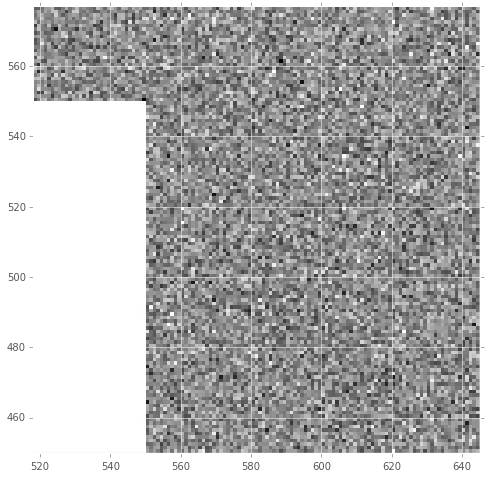

In [6]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
img = np.random.normal(0., 10., (1028,1028))
img[450:550, 450:550] = 50.
w = plot_interact(img)